___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train[8].shape

(28, 28)

In [6]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   1,   0,   0,   1,   1,   0,   0,   0,   0,  58,   0,  39,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   0,   0,   0,   0,   0,   0,   0,  64, 109, 146, 192, 193,
          7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,  94,  38,  99, 209, 183, 229, 192, 142,  48,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,  41,  45, 158, 146, 164, 114,  51,   1,  53, 105,  42,  36,
          0,   0],
       [  

In [7]:
y_train[8]

5

In [8]:
y_train.shape

(60000,)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

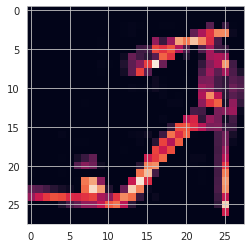

In [10]:
plt.imshow(X_train[8])

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
y_train[8]

5

In [14]:
classes[int(y_train[8])]

'Sandal'

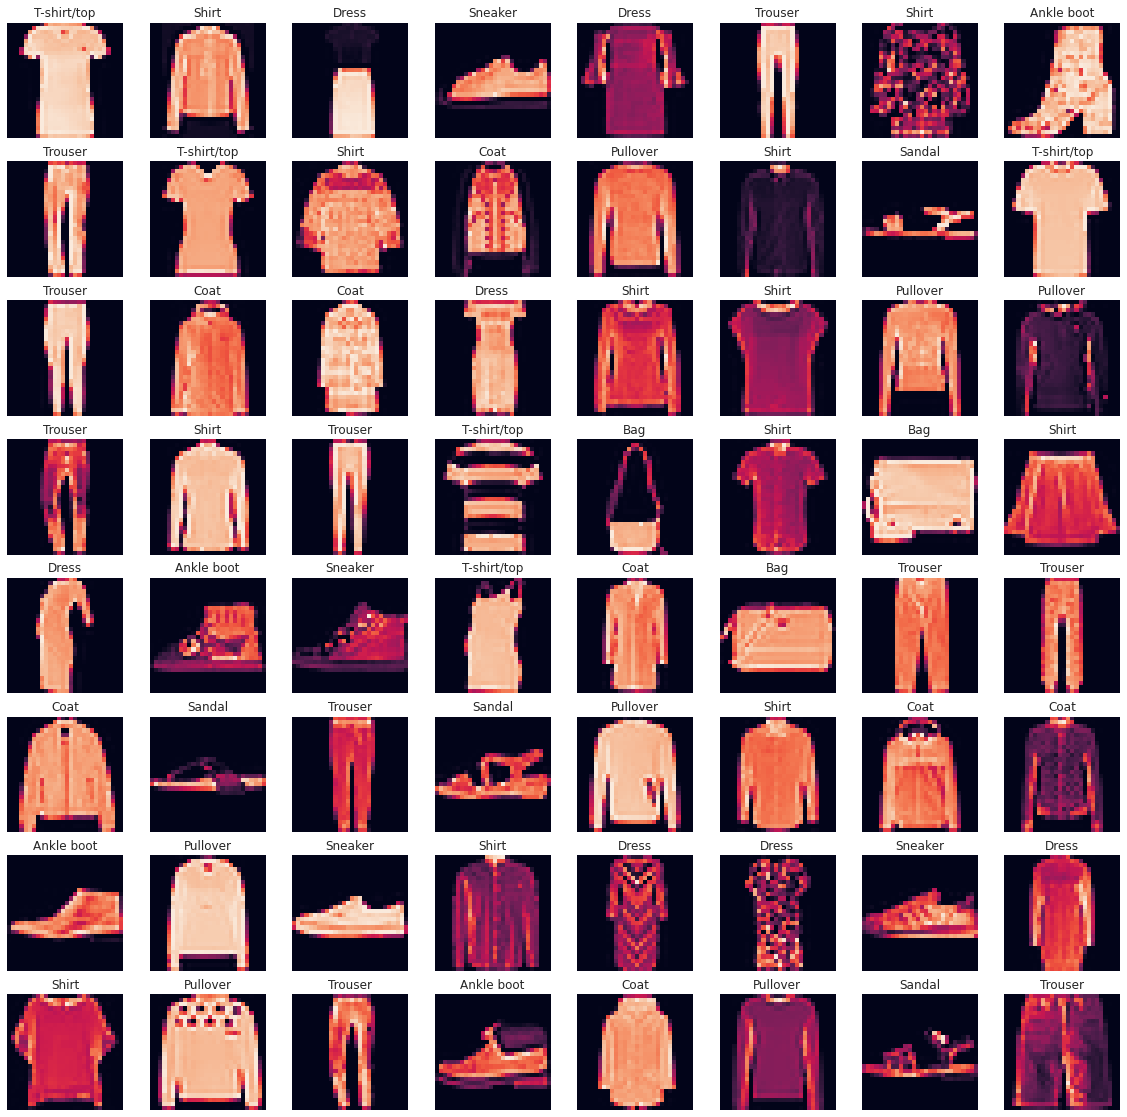

In [15]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
X_train[8].min()

0

In [17]:
X_train[8].max()

255

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[8].min()

0.0

In [20]:
X_train[8].max()


1.0

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

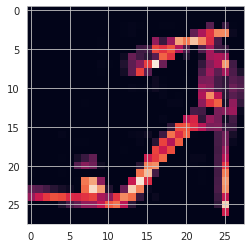

In [22]:
plt.imshow(X_train[8])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [24]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
y_train , y_train.shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10)   
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [29]:
y_train[8]

5

In [30]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4156 - accuracy: 0.8483 - val_loss: 0.3286 - val_accuracy: 0.8825
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2768 - accuracy: 0.8970 - val_loss: 0.2960 - val_accuracy: 0.8935
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2278 - accuracy: 0.9154 - val_loss: 0.2671 - val_accuracy: 0.9026
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1947 - accuracy: 0.9269 - val_loss: 0.2810 - val_accuracy: 0.9041
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1644 - accuracy: 0.9377 - val_loss: 0.2389 - val_accuracy: 0.9167
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1397 - accuracy: 0.9470 - val_loss: 0.2651 - val_accuracy: 0.9176
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1176 - accuracy: 0.9548 - val_loss: 0.2710 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.416,0.848,0.329,0.882
1,0.277,0.897,0.296,0.893
2,0.228,0.915,0.267,0.903
3,0.195,0.927,0.281,0.904
4,0.164,0.938,0.239,0.917
5,0.140,0.947,0.265,0.918
6,0.118,0.955,0.271,0.916


In [39]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.416,0.848,0.329,0.882
1,0.277,0.897,0.296,0.893
2,0.228,0.915,0.267,0.903
3,0.195,0.927,0.281,0.904
4,0.164,0.938,0.239,0.917
5,0.140,0.947,0.265,0.918
6,0.118,0.955,0.271,0.916


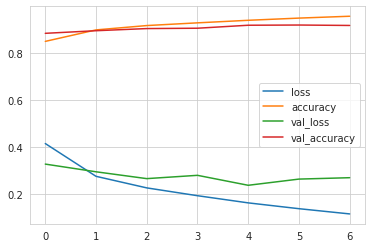

In [40]:
summary.plot();

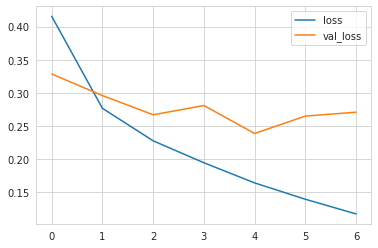

In [41]:
summary[["loss", "val_loss"]].plot();

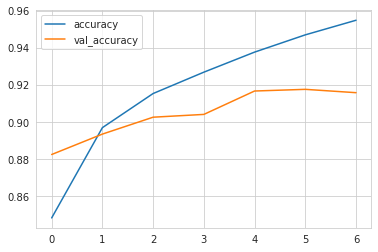

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9167


[0.238852396607399, 0.916700005531311]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.238852396607399
Test accuracy: 0.916700005531311


In [46]:
pred_prob = model.predict(X_test)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.90      0.94      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.83      0.66      0.73      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [50]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
print(confusion_matrix(y_test, y_pred))

[[923   1  17  22   1   0  34   0   2   0]
 [  0 986   0  10   2   0   0   0   2   0]
 [ 20   0 867   9  64   0  39   0   1   0]
 [ 15   4  10 944  17   0  10   0   0   0]
 [  0   1  30  35 888   0  45   0   1   0]
 [  0   0   0   0   0 986   0   8   2   4]
 [176   1  68  29  66   0 656   0   4   0]
 [  0   0   0   0   0  11   0 958   0  31]
 [  5   1   2   3   4   0   2   1 982   0]
 [  1   0   0   0   0   4   0  18   0 977]]


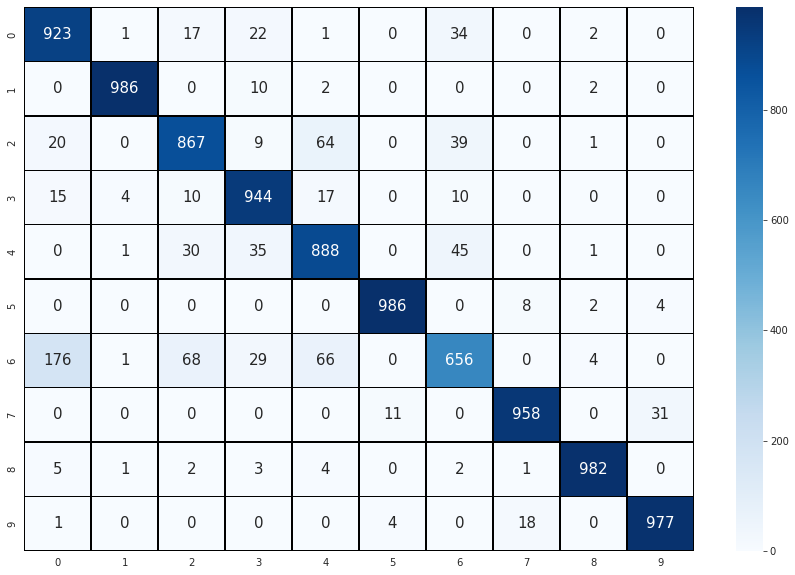

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Modelling-2

In [53]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides = (1,1))) 
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 27, 27, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                  

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [56]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3920 - accuracy: 0.8594 - val_loss: 0.2735 - val_accuracy: 0.9034
Epoch 2/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2428 - accuracy: 0.9097 - val_loss: 0.2343 - val_accuracy: 0.9181
Epoch 3/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2025 - accuracy: 0.9250 - val_loss: 0.2322 - val_accuracy: 0.9170
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1752 - accuracy: 0.9345 - val_loss: 0.2242 - val_accuracy: 0.9174
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1551 - accuracy: 0.9420 - val_loss: 0.2248 - val_accuracy: 0.9168
Epoch 6/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1354 - accuracy: 0.9489 - val_loss: 0.2234 - val_accuracy: 0.9227
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1226 - accuracy: 0.9545 - val_loss: 0.2187 -

In [57]:
model.metrics_names

['loss', 'accuracy']

In [58]:
 pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.392,0.859,0.273,0.903
1,0.243,0.910,0.234,0.918
2,0.202,0.925,0.232,0.917
3,0.175,0.935,0.224,0.917
4,0.155,0.942,0.225,0.917
5,0.135,0.949,0.223,0.923
6,0.123,0.954,0.219,0.923
7,0.108,0.960,0.227,0.928
8,0.100,0.963,0.257,0.921


In [59]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.392,0.859,0.273,0.903
1,0.243,0.910,0.234,0.918
2,0.202,0.925,0.232,0.917
3,0.175,0.935,0.224,0.917
4,0.155,0.942,0.225,0.917


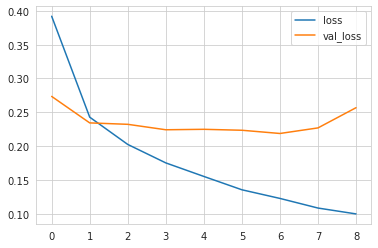

In [60]:
summary[["loss", "val_loss"]].plot();

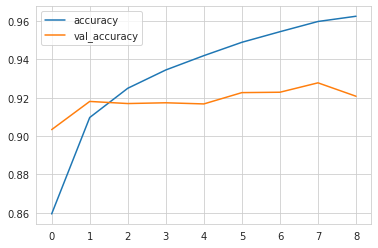

In [61]:
summary[["accuracy", "val_accuracy"]].plot();

## Evaluatin on Data 

In [62]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2187 - accuracy: 0.9229


[0.21867448091506958, 0.9229000210762024]

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21867448091506958
Test accuracy: 0.9229000210762024


In [64]:
pred_prob = model.predict(X_test)

In [65]:
y_pred = np.argmax(pred_prob, axis=1)

In [66]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       1.00      0.99      0.99      1000
           2       0.86      0.90      0.88      1000
           3       0.89      0.95      0.92      1000
           4       0.89      0.86      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.78      0.78      0.78      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



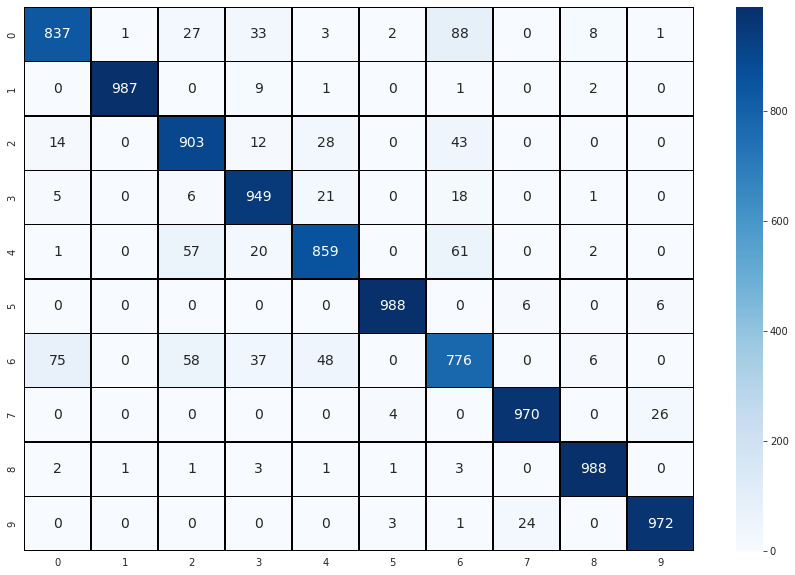

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [69]:
my_image = X_test[8]

In [70]:
my_image.shape

(28, 28, 1)

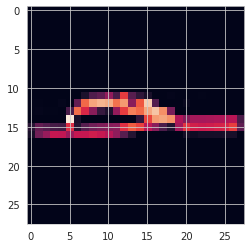

In [71]:
plt.imshow(my_image.reshape(28,28));

In [72]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [73]:
image_prediction

array([[1.44112615e-08, 1.82676790e-12, 1.37030394e-12, 1.37525599e-11,
        1.81294684e-11, 1.00000000e+00, 7.92906363e-09, 2.22885720e-11,
        2.06957314e-08, 5.84551735e-14]], dtype=float32)

In [74]:
np.argmax(image_prediction, axis=1)

array([5])

In [75]:
result=np.argmax(image_prediction, axis=1)
result

array([5])

In [76]:
classes[int(result)]

'Sandal'

In [77]:
model.save("cnn2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___